# Austin Animal Center Euthanasia Analysis
Below I am going to analyze euthanasia statistics for dogs and cats at the Austin Animal Center. Raw data was collected from the City of Austin.

To filter `'austin-animal-center-outcomes-1.csv'` for analysis, I used the following SQL query and exported the results to `'aac-dog-cat-euthanasia.csv'`.

```SQL
SELECT animal_id, name, animal_type, outcome_subtype, sex_upon_outcome, age_upon_outcome FROM austin_animal_center_outcomes_1
WHERE outcome_type = 'Euthanasia'
    AND (animal_type = 'Dog' OR animal_type = 'Cat')
ORDER BY animal_id
```

This query limited the dataset to dogs and cats that have been euthanized at the Austin Animal Center from October 1st, 2013 to May 15, 2020 and the columns I am interested in comparing.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('aac-dog-cat-euthanasia.csv')

df.head()

In order to analyze this dataset most efficiently, the `sex_upon_outcome` and `age_upon_outcome` columns must be cleaned up.

The `sex_upon_outcome` column will be simplified to `'Male'` or `'Female'`, disregarding fixed status. Sex marked as `'Unknown'` will remain unchanged.

`'age_upon_outcome'` cells in which the age is in weeks, months, or days or is marked as `'0 years'` will be re-coded to `'< 1 year'`. Age marked as `NULL` will remain unchanged.

In [114]:
simplify_sex = lambda sex: sex.split()[-1]
df['sex_upon_outcome'] = df['sex_upon_outcome'].apply(simplify_sex)

simplify_age = lambda age: '< 1 year' if (age == '0 years' or 'week' in str(age) or 'month' in str(age) or 'day' in str(age)) else age
df['age_upon_outcome'] = df['age_upon_outcome'].apply(simplify_age)

This simplified dataframe will be saved to a new CSV.

In [115]:
df.to_csv('aac-dog-cat-euthanasia-simplified.csv')
df.head()

,animal_id,name,animal_type,outcome_subtype,sex_upon_outcome,age_upon_outcome
676,A673611,Blackie,Dog,Aggressive,Male,2 years
1774,A701992,Tau,Dog,Aggressive,Male,5 years
883,A679533,Star,Dog,Aggressive,Female,3 years
520,A669416,Espana,Dog,Aggressive,Female,1 year
1707,A700027,NaN,Dog,Aggressive,Female,1 year


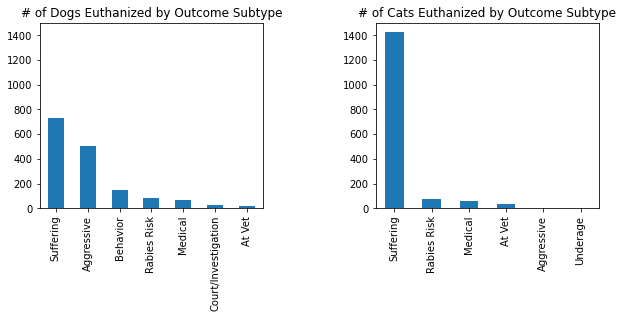

In [154]:
plt.subplot(1, 2, 1)
ax = df[df['animal_type'] == 'Dog'].outcome_subtype.value_counts().plot.bar(ylim=(0,1500))
plt.title('# of Dogs Euthanized by Outcome Subtype')

plt.subplot(1, 2, 2)
ax = df[df['animal_type'] == 'Cat'].outcome_subtype.value_counts().plot.bar(ylim=(0,1500))
plt.title('# of Cats Euthanized by Outcome Subtype')

plt.tight_layout(w_pad=8, pad=-8)

The above graphs compare the euthanasia subtypes (or reasons for euthanasia) reported by the Austin Animal Center.

Both dogs and cats had 'Suffering' as the most common reason for being euthanized. However, dogs had more variation in subtype while cats were overwhelmingly put down for this single reason.

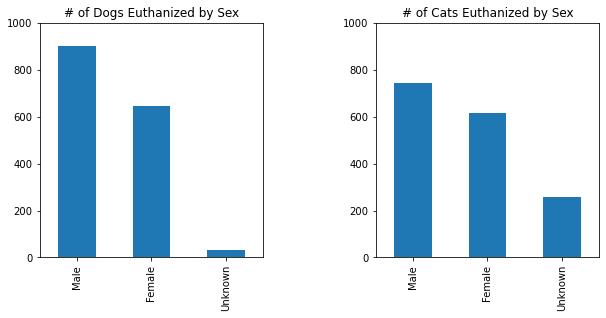

In [131]:
plt.subplot(1, 2, 1)
ax = df[df['animal_type'] == 'Dog'].sex_upon_outcome.value_counts().plot.bar(ylim=(0,1000))
plt.title('# of Dogs Euthanized by Sex')

plt.subplot(1, 2, 2)
ax = df[df['animal_type'] == 'Cat'].sex_upon_outcome.value_counts().plot.bar(ylim=(0,1000))
plt.title('# of Cats Euthanized by Sex')

plt.tight_layout(w_pad=8, pad=-8)

The above graphs compare the sex of the dogs and cats reported by the Austin Animal Center.

Cats had a significantly higher number of 'Unknown' sex animals upon euthanasia. As demonstrated by the graph below, this could be due to the number of young ('< 1 year') cats euthanized. According to the [United States Humane Society](https://humanepro.org/magazine/articles/fact-sheet-how-determine-kittens-sex), it can take up until a cat is 10 weeks old to determine its sex.

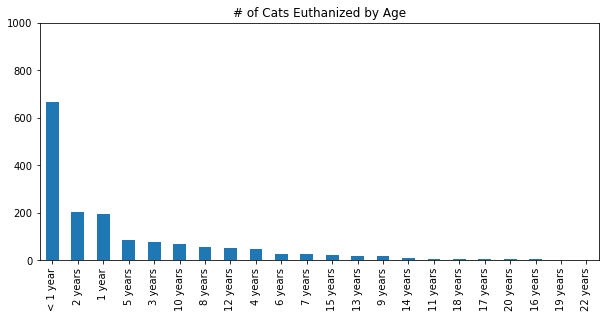

In [135]:
ax = df[df['animal_type'] == 'Cat'].age_upon_outcome.value_counts().plot.bar(ylim=(0,1000))
plt.title('# of Cats Euthanized by Age')

plt.tight_layout(pad=-8)